# DBSCAN
![Alt Text](gif.gif)

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

In [2]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [3]:
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [4]:
X = StandardScaler().fit_transform(X)

In [5]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [6]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [7]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [8]:
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [11]:
set(labels)

{-1, 0, 1, 2}

In [12]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - 1
n_noise_ = list(labels).count(-1)

In [14]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


1. **Homogeneity:**
   - Homogeneity measures whether all of the clusters contain only data points that are members of a single class. A higher homogeneity score (closer to 1) indicates better-defined clusters with respect to the true classes.

2. **Completeness:**
   - Completeness measures whether all members of a given class are assigned to the same cluster. A higher completeness score (closer to 1) indicates that the algorithm has captured all members of each true class within a cluster.

3. **V-measure:**
   - The V-measure is the harmonic mean of homogeneity and completeness. It provides a balance between these two metrics. A higher V-measure indicates a good balance between precision and recall.

4. **Adjusted Rand Index:**
   - The Adjusted Rand Index (ARI) measures the similarity between the true clustering and the predicted clustering, corrected for chance. A higher ARI (closer to 1) indicates better agreement between the true and predicted clusters.

5. **Adjusted Mutual Information:**
   - Adjusted Mutual Information (AMI) measures the mutual information between the true and predicted clusterings, adjusted for chance. A higher AMI (closer to 1) indicates better agreement between the true and predicted clusters.

6. **Silhouette Coefficient:**
   - The Silhouette Coefficient measures how well-separated the clusters are. It ranges from -1 to 1, where a higher value indicates better-defined clusters. A value around 0 indicates overlapping clusters.

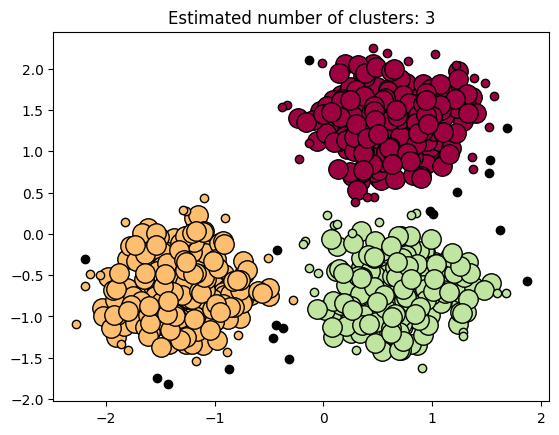

In [15]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [30]:
# Generate synthetic data (you can replace this with your real data)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

In [31]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 'auto')
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

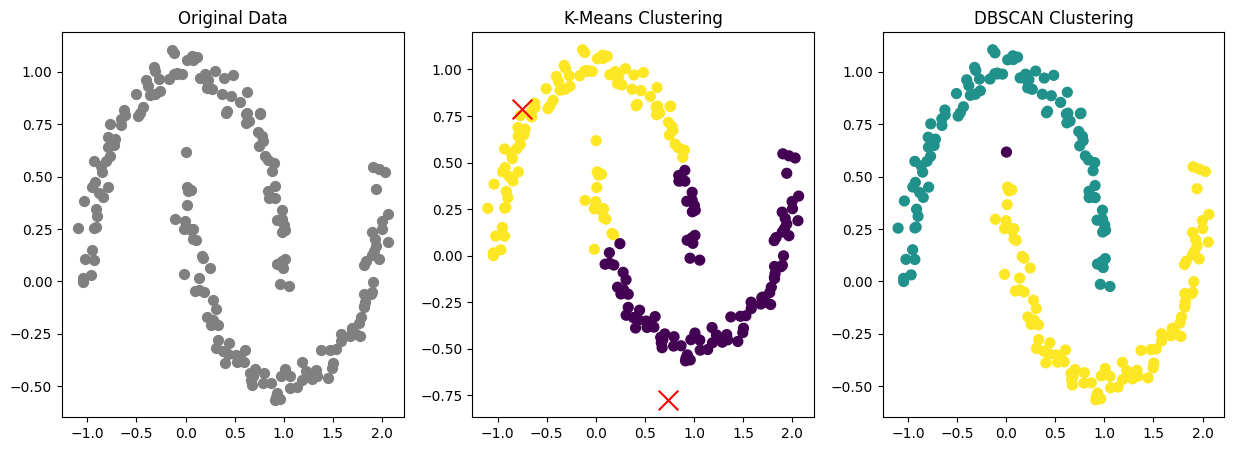

In [35]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Plot original data points
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', s=50)
plt.title("Original Data")

# Plot K-Means clusters
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("K-Means Clustering")

# Plot DBSCAN clusters
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', s=50)
plt.title("DBSCAN Clustering")

plt.show()

In [24]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

Number of clusters: 4
Homogeneity: 0.9935269960369683
Completeness: 0.6328048727207168
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: -0.039


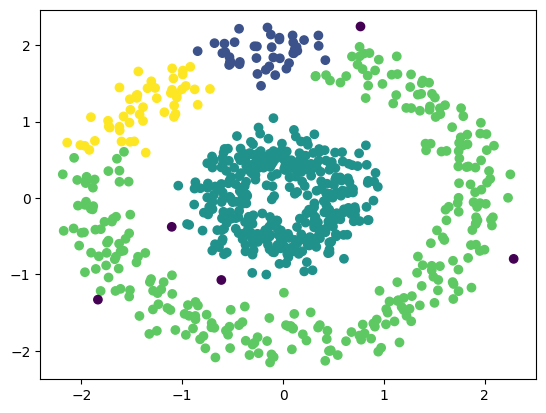

In [25]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))